In [26]:
import math
import numpy as np
from numpy.linalg import norm
from my_optimization import *
ar = lambda x: np.array(x)

A2 = ar([[2, 0, 0.005],
         [0, 8, 0],
        [0.005, 0, 3]])
b = ar([-1, -1, 0])

A = 2 * A2
n=3
def f(x):
    return 2*x[0]**2 + 8*x[1]**2 + 3*x[2]**2+0.001*x[0]*x[2]-x[0]-x[1]

In [27]:
def conj_dir_opt(f, x, eps = 1e-3, max_iter = 200):
    x = ar(x)
    def beta(h, x, grad, prev_grad):
        if norm(h) == 0:
            return 0
        print(gradient(f, x), A@h)
        num = np.linalg.norm(gradient(f, x))**2
        denom = h@(A@h)
        return num/denom
    print("Minimizing fuction with conjagation diractions method (nonlinear)")
    print(f"0. x0 = {x}. f(x0) = {f(x)}")

    h = x*0
    prev_grad = 0
    history = np.array([x])
    x_prev = x
    for i in range(max_iter):
        grad = gradient(f, x)
        cur_beta = 0
        if ( i%n != 0 ):
            cur_beta = beta(h, x, grad, prev_grad)
        h = - grad + cur_beta*h
        f_to_min = lambda a: f(x + a*h)
        alpha = golden_section(f_to_min, 0, 1, speaks=False)
        x = x + alpha*h
        prev_grad = grad
        print(f"{i+1}. x = {x}, f(x) = {f(x)}, h = {h}, alpha = {alpha} ")
        if(np.linalg.norm(x - x_prev) < eps):
            break
        history = np.vstack((history, np.array(x)))
        x_prev = x
    return x, history
        

# Мінімізуємо 

In [33]:
x0 = [10, 10, 10]
x_min, history = conj_dir_opt(f, [1000, -1010, 1010], max_iter=1000)

Minimizing fuction with conjagation diractions method (nonlinear)
0. x0 = [ 1000 -1010  1010]. f(x0) = 13222120.0
1. x = [718.66771931 126.63481579 583.72428027], f(x) = 2183033.9015216012, h = [-4000.03045797 16160.86810827 -6060.86105108], alpha = 0.0703325346249699 
[2874.24772978 2025.13765544 3503.05344909] [-16060.7304424  258573.88973236 -36405.16661108]
2. x = [ 295.44703378 -156.2528548    66.95844323], f(x) = 383228.4244645779, h = [-2896.32289333 -1935.94988288 -3536.50181915], alpha = 0.1461234472540605 
[ 1180.85590657 -2501.04640145   402.04322431] [-11620.65659153 -30975.19812608 -21247.97414384]
3. x = [194.63130336  28.63521746  23.58339747], f(x) = 83772.34737791658, h = [-1314.91061761  2411.44202662  -565.7282646 ], alpha = 0.07667116614011818 
4. x = [ 84.44848495 -36.14741943   3.50437012], f(x) = 24705.017377174598, h = [-777.54884842 -457.16442401 -141.69563656], alpha = 0.14170533288755918 
[ 336.7969839  -579.35867517   21.11064532] [-3111.61235004 -7314.63078

In [34]:
history

array([[ 1.00000000e+03, -1.01000000e+03,  1.01000000e+03],
       [ 7.18667719e+02,  1.26634816e+02,  5.83724280e+02],
       [ 2.95447034e+02, -1.56252855e+02,  6.69584432e+01],
       [ 1.94631303e+02,  2.86352175e+01,  2.35833975e+01],
       [ 8.44484850e+01, -3.61474194e+01,  3.50437012e+00],
       [ 5.13230940e+01,  9.37276655e+00,  8.34356834e-01],
       [ 2.45778350e+01, -8.86072982e+00,  1.38570623e-01],
       [ 1.65996697e+01,  2.84452791e+00,  6.83921921e-02],
       [ 7.52788007e+00, -2.84400008e+00,  8.65372120e-03],
       [ 4.65803337e+00,  9.08718581e-01,  1.09458597e-03],
       [ 2.56885304e+00, -6.95537052e-01, -2.35492001e-04],
       [ 1.60812076e+00,  3.69439460e-01, -4.02422869e-04],
       [ 9.71795999e-01, -1.55760982e-01, -3.15976084e-04],
       [ 7.12517157e-01,  1.57848183e-01, -2.32992303e-04],
       [ 4.81878795e-01, -1.46062844e-02, -1.47981649e-04],
       [ 3.87275595e-01,  9.28399875e-02, -1.07182137e-04],
       [ 3.27981340e-01,  4.04202604e-02

## Порівняємо результат із оптимізацією з бібліотеки

In [35]:
from scipy.optimize import minimize
minimize(f, x0)

      fun: -0.1562500052074215
 hess_inv: array([[ 2.50214831e-01,  1.85688856e-04, -1.42719186e-04],
       [ 1.85688856e-04,  6.26605936e-02, -8.75317370e-05],
       [-1.42719186e-04, -8.75317370e-05,  1.66714223e-01]])
      jac: array([ 1.32247806e-06,  4.58210707e-06, -1.02072954e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([ 2.50000334e-01,  6.25002789e-02, -4.18297406e-05])

In [36]:
def plot_trace(history, r = 1, rotate = None):
    u = np.linspace(0, np.pi, 10)
    v = np.linspace(0, 2 * np.pi, 10)

    x = r*np.outer(np.sin(u), np.sin(v))
    y = r*np.outer(np.sin(u), np.cos(v))
    z = r*np.outer(np.cos(u), np.ones_like(v))


    fig = plt.figure(figsize = (25, 25))
    ax = plt.axes(projection='3d')


    ax.plot(history.T[0], history.T[1], history.T[2], color = "red", marker = "o")
    if rotate is not None:
        ax.view_init(*rotate)

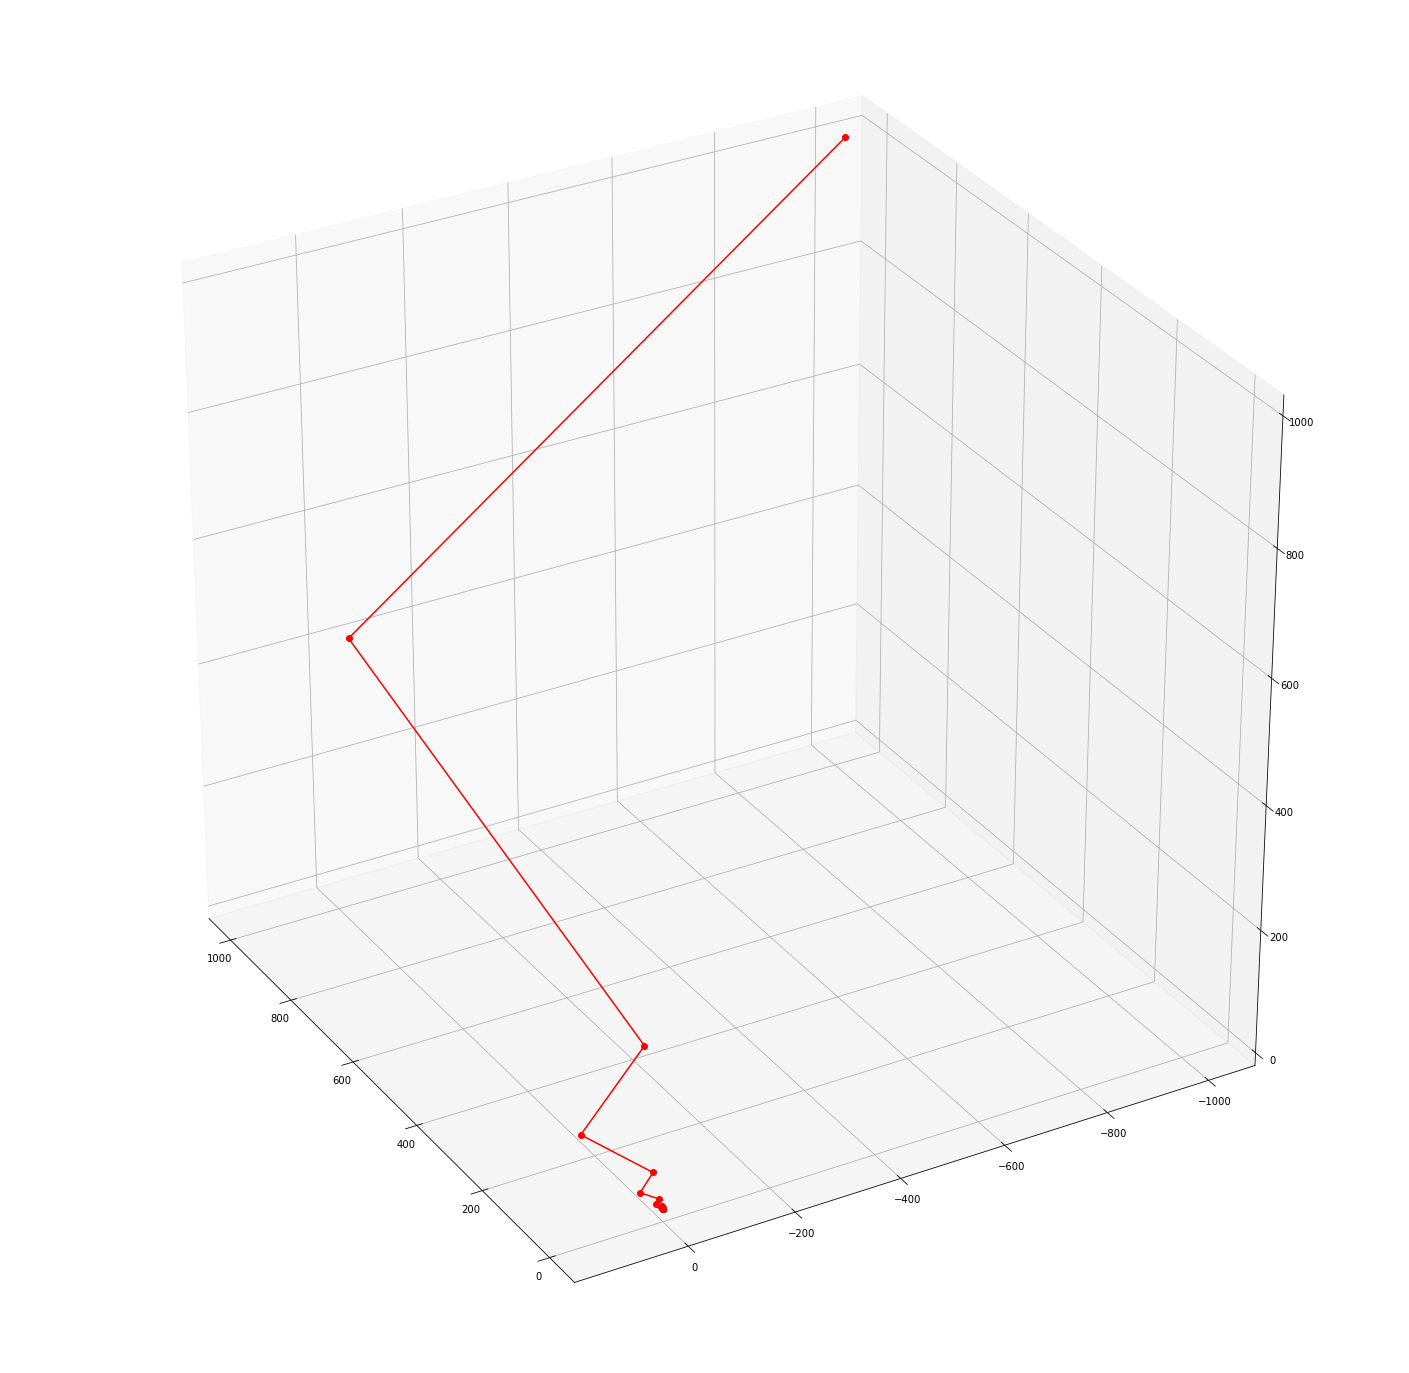

In [37]:
plot_trace(history, rotate = (30, 150))